<a href="https://colab.research.google.com/github/nohjuhyeon/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사용할 pickle 불러오기
- sentence_tokenizing : 문장 토큰화 모델
- classification_topic : 토픽 분류 모델

In [215]:
file_path = 'NLP_classification_ynanaewstitles.pkl'
import pickle
with open(file_path,'rb') as pickle_file:
  classification_topic = pickle.load(pickle_file)

type(classification_topic)

sklearn.ensemble._forest.RandomForestClassifier

In [216]:
# pickle 불러오기
file_path = 'sentence_tokenizing.pkl'
import pickle
with open(file_path,'rb') as pickle_file:
  sentence_tokenizing = pickle.load(pickle_file)

type(sentence_tokenizing)

sklearn.feature_extraction.text.TfidfVectorizer

## 한글처리

In [217]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [218]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


## 사용할 데이터 불러오기 및 전처리

In [219]:
# 파일 불러오기
import pandas as pd
df_IT_news = pd.read_excel('IT News.xlsx', sheet_name = None)
topic = pd.read_csv("topic_dict.csv")
len(df_IT_news)

45

In [220]:
df_sheets = []
for sheet_name, df in df_IT_news.items():
  df_sheets.append(df)
  df_sheets[-1].loc[:,'문장 요약'].fillna("",inplace=True)
df_sheets[0]

,이름,선호도 투표,뉴스명,문장 요약,한 줄평
0,문석천,NaN,"개보위 ""맞춤형 광고 개인정보 처리 투명성 높인다""",정부가 맞춤형 광고에 사용되는 개인정보 처리 투명성을 높인다. 앞으로 광고 사업자와...,개인 정보 관리 및 처리의 투명성을 높여야 한다고 생각했는데 정부가 이와 관련하여 ...
1,김유진,1.0,"카카오쇼핑 모바일 교환권, 삼성페이에서 쓴다",카카오톡 선물하기에서 선물 받은 모바일 교환권을 삼성페이와 연동할 수 있다. 선물함...,"이용자들은 카페, 식당, 영화관 등에서 삼성페이를 켜고 해당 모바일 교환권을 터치해..."
2,노주현,1.0,AI로 인간추론능력 40% 높였다,KAIST는 이상완 뇌인지과학과 교수 연구팀이 인간의 빠른 추론 능력을 유도해 인과...,멀지 않은 미래에는 교육의 방식에도 많은 변화가 있을 것 같다.
3,김하늘,11.0,인간 뇌조직으로 컴퓨터 구축 성공,인간 줄기세포로 만든 뇌조직(미니 뇌)을 전자칩에 연결한 '브레인웨이'를 구축해 간...,인간의 뇌를 완전히 이해하지 못한 상황에서 과연 인간의 뇌를 흉내낼 수 있을지 모르겠다
4,박요한,NaN,주담대 갈아타기 대박 낸 네이버·카카오페이 '전월세대출 갈아타기' 출시,네이버페이와 카카오페이(377300)가 '전월세대출 갈아타기' 서비스를 출시한다고 ...,주택담보대출에 대한 차입 증권화등을 통해 STO 사업이 가능하지 않을까?
5,오지수,NaN,"""쇼핑몰 매장·화장실 위치 한눈에""…카카오맵, 실내지도 서비스","카카오의 위치 기반 라이프플랫폼 카카오맵은 백화점, 아울렛, 대형 쇼핑몰 등 국내 ...",카카오맵 유입/네이버지도 이탈 증가와 지도 서비스 내 광고 효과의 확대가 예상된다.
6,김명준,11111.0,"뇌 안에 컴퓨터 있다... 머스크의 ‘뉴럴링크’, 칩 이식 성공",사람의 뇌에 칩을 심어 질병과 장애를 극복하는 공상과학(SF) 영화가 현실이 되고 ...,뇌는 지금까지 10%도 파악하지 못한 미지의 영역이기에 뇌의 신호를 제대로 포착하고...
7,공명윤,NaN,NaN,,NaN
8,한동철,NaN,NaN,,NaN
9,조유경,NaN,"중고거래 플랫폼 구입 에어프라이어, 불량인데 판매자 연락도 안된다?",중고거래 플랫폼 사용량의 급증으로 중고물품 피해사례도 급증하고 있다.,대형 중고거래 플랫폼들은 자체 분쟁조정센터를 운영하여 이에 대한 대책을 마련하고 있...


## 문장 토큰화하기

In [221]:
! pip install konlpy

In [222]:
from konlpy.tag import Okt
okt = Okt()

In [223]:
# 형태소 분석 함수
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [224]:
# 문장 토큰화 함수
def sentence_token(x,okt_clean,sentence_tokenizing):
  sentence_nouns = okt_clean(x)
  sentence_tokens = sentence_tokenizing.transform([sentence_nouns])
  return sentence_tokens.toarray()

In [225]:
# topic 리스트 만드는 함수
def topic_list_make(df_sheets,sentence_token,condition_list):
  column_name = df_sheets[0].columns[0]
  condition = f"{column_name} in {condition_list}"
  sentence_list = []
  for i in range(len(df_sheets)):
    for j in range(len(df_sheets[i])):
      try:
        sentence_tokens_array = sentence_token(df_sheets[i].query(condition)['문장 요약'].values[j],okt_clean,sentence_tokenizing)
        topic_index=int(classification_topic.predict(sentence_tokens_array)[0])
        sentence_list.append(topic.iloc[topic_index,0])
      except:
        pass
  Series_topic = pd.Series(data=sentence_list)
  topic_list = Series_topic.value_counts()
  return topic_list

In [226]:
user_list = ["노주현"]

user_topic_list = topic_list_make(df_sheets,sentence_token,user_list)
user_topic_list

사회      21
IT과학    16
경제       1
세계       1
정치       1
dtype: int64

In [227]:
entire_user_list = list(df_sheets[0]["이름"].values)

entire_topic_list = topic_list_make(df_sheets,sentence_token,entire_user_list)
entire_topic_list

사회      336
IT과학    211
경제       29
세계       11
정치        9
생활문화      3
스포츠       1
dtype: int64

## Wordcloud

### user wordcloud

In [228]:
from wordcloud import WordCloud

In [229]:
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
user_wordcloud = wordCloud.generate_from_frequencies(user_topic_list)
user_wordcloud

In [230]:
user_wordcloud.words_

{'사회': 1.0,
 'IT과학': 0.7619047619047619,
 '경제': 0.047619047619047616,
 '세계': 0.047619047619047616,
 '정치': 0.047619047619047616}

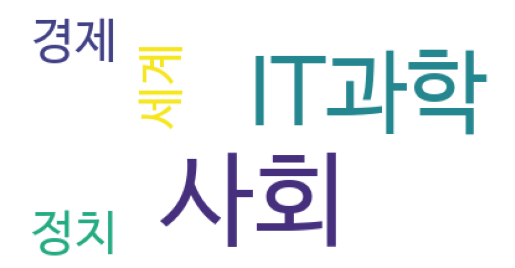

In [231]:
import matplotlib.pyplot as plt
plt.imshow(user_wordcloud)
plt.axis('off')
plt.show()

### entire wordcloud

In [232]:
from wordcloud import WordCloud

In [233]:
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
user_wordcloud = wordCloud.generate_from_frequencies(entire_topic_list)
user_wordcloud

In [234]:
user_wordcloud.words_

{'사회': 1.0,
 'IT과학': 0.6279761904761905,
 '경제': 0.08630952380952381,
 '세계': 0.03273809523809524,
 '정치': 0.026785714285714284,
 '생활문화': 0.008928571428571428,
 '스포츠': 0.002976190476190476}

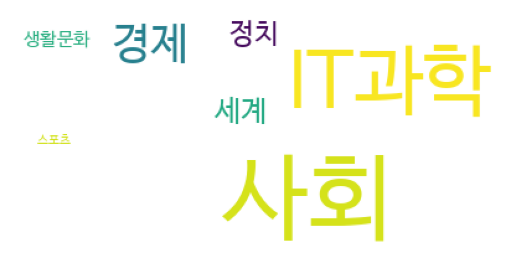

In [235]:
import matplotlib.pyplot as plt
plt.imshow(user_wordcloud)
plt.axis('off')
plt.show()